In [128]:
#implementation of logistic regression
from matplotlib import pyplot as plt
import numpy as np
from numpy import genfromtxt
import pandas as pd
#reading data from csv file 
headers = ['x1','x2','y']
data = pd.read_csv('Logisticdataset.csv',sep=',',names=headers)
data.head()


,x1,x2,y
0,x1,x2,y
1,4.5192,2.6487,1.0
2,2.4443,1.5438,1.0
3,4.2409,1.899,1.0
4,5.8097,2.4711,1.0


In [129]:
#loading the data into respective array
x1 = genfromtxt('Logisticdataset.csv',delimiter=',',names=True,usecols=('x1'))
x1=np.array(x1,dtype=float)
x2 = genfromtxt('Logisticdataset.csv',delimiter=',',names=True,usecols=('x2'))
x2=np.array(x2,dtype=float)
y =  genfromtxt('Logisticdataset.csv',delimiter=',',names=True,usecols=('y'))
y=np.array(y,dtype=bool)

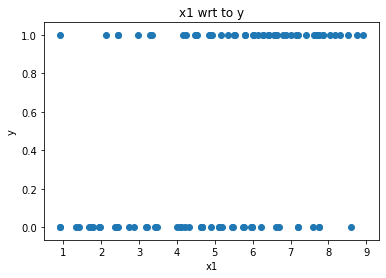

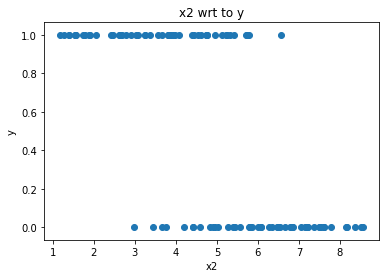

In [130]:
#plotting the data
plt.scatter(x1,y)
plt.title('x1 wrt to y')
plt.ylabel('y')
plt.xlabel('x1')
plt.show()
plt.scatter(x2,y)
plt.title('x2 wrt to y')
plt.ylabel('y')
plt.xlabel('x2')
plt.show()

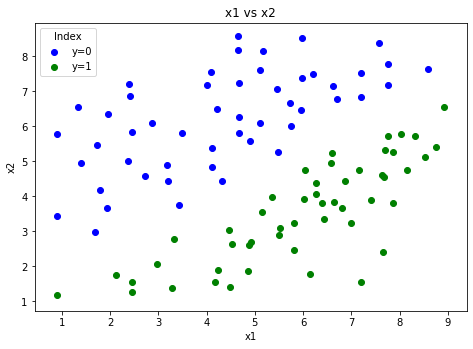

In [131]:
x11=x1[y==1]
x21=x2[y==1]
x10=x1[y==0]
x20=x2[y==0]
fig=plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.scatter(x10,x20,color='blue',label='y=0')
ax.scatter(x11,x21,color='green',label='y=1')
ax.set_ylabel('x2')
ax.set_xlabel('x1')
ax.set_title('x1 vs x2')
ax.legend(title='Index',loc='best')
plt.show()


In [132]:
#logistic regression algorithm implementation
m = len(y)
x0=np.ones(m) #x0 is always 1 in linear regression 
X=np.array([x0,x1,x2]).T # x is matrix of row x0,x1,x2
B=np.zeros(3) #here B=[theta0,theta1,theta2]=[0, 0, 0]
#hypothesis function:h(x)=b0 + b1x1 + b2x2 since two features are used i.e. x1 and x2
alpha=0.0001 #alpha is learning rate

In [133]:
def cost_function(y,H):
    J1=-(y.T.dot(np.log(H)))
    J2=(1-y).T.dot(np.log(1-h))
    J=(J1-J2)/m
    return J

In [134]:
#calculating initial cost
h=X.dot(B)
H=1/(1+np.exp(-h))
initial_cost=cost_function(y,H)  
print(initial_cost)

0.3465735902799726


In [135]:
def gradi_desc(X,B,alpha,y,iteration):
    cost_iter=np.zeros(iteration)
    m=len(y)
    for i in range(iteration):     
        h=X.dot(B)
        H=1/(1+np.exp(-h))
        loss=H-y
        gradient=X.T.dot(loss)/m
        B=B-alpha*gradient
        cost=cost_function(y,H)
        cost_iter[i]=cost
    return B,cost_iter    

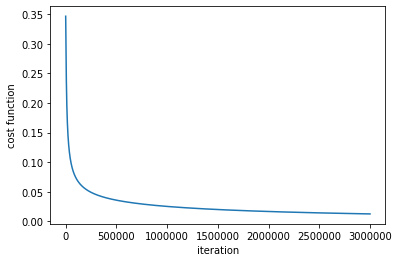

In [136]:
newB, cost_history = gradi_desc(X,B, alpha,y,3000000)
x=np.arange(1,3000001)
plt.plot(x,cost_history)
plt.xlabel('iteration')
plt.ylabel('cost function')
plt.show()


In [137]:
newB #value of theta0,theta1,theta2

array([ 2.62357581,  3.34288951, -4.34874572])

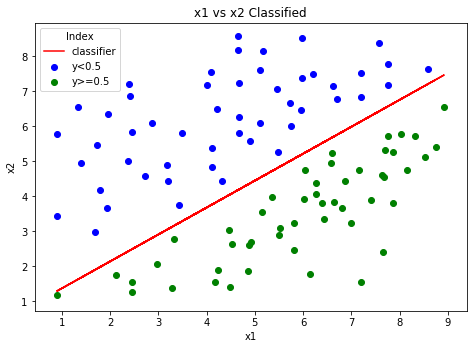

In [138]:
Ypred=1/(1+np.exp(-(X.dot(newB))))
pred_data=np.array([x1,x2,Ypred])
x11=x1[Ypred>=0.5]
x21=x2[Ypred>=0.5]
x10=x1[Ypred<0.5]
x20=x2[Ypred<0.5]
theta0=np.full(100,newB[0])
theta1=np.full(100,newB[1])
theta2=newB[2]
x2=(-theta0-theta1*x1)*(1/theta2)
fig=plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.scatter(x10,x20,color='blue',label='y<0.5')
ax.scatter(x11,x21,color='green',label='y>=0.5')
ax.plot(x1,x2,color='red',label="classifier")
ax.set_ylabel('x2')
ax.set_xlabel('x1')
ax.set_title('x1 vs x2 Classified')
ax.legend(title='Index',loc='best')
plt.show()